In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.datasets import load_boston

# Understand the data

### Load boston dataset

In [2]:
boston = load_boston()

### Understand the data

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
data = pd.DataFrame(boston.data, columns=boston.feature_names)
data['Price'] = boston.target
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


<function matplotlib.pyplot.show>

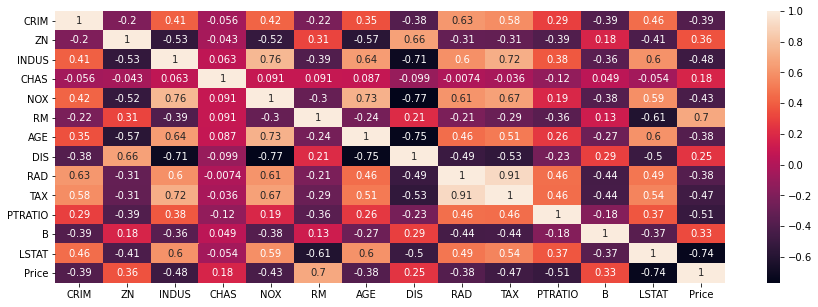

In [5]:
correlation_map = data.corr()
fig, ax = plt.subplots(figsize=(15,5))
sns.heatmap(correlation_map,annot = True)
plt.show

### Select the most important correlations

In [6]:
features=[]
values=[]
for i, index in enumerate(correlation_map['Price'].index):
    if abs(correlation_map['Price'][index])> 0.45:
        features.append(index)
        values.append(correlation_map['Price'][index])
        
df = pd.DataFrame(data = values, index = features, columns=['Correlated Values'])
df

,Correlated Values
INDUS,-0.483725
RM,0.695360
TAX,-0.468536
PTRATIO,-0.507787
LSTAT,-0.737663
Price,1.000000


In [7]:
correlated_data = data[df.index]
correlated_data

,INDUS,RM,TAX,PTRATIO,LSTAT,Price
0,2.31,6.575,296.0,15.3,4.98,24.0
1,7.07,6.421,242.0,17.8,9.14,21.6
2,7.07,7.185,242.0,17.8,4.03,34.7
3,2.18,6.998,222.0,18.7,2.94,33.4
4,2.18,7.147,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...
501,11.93,6.593,273.0,21.0,9.67,22.4
502,11.93,6.120,273.0,21.0,9.08,20.6
503,11.93,6.976,273.0,21.0,5.64,23.9
504,11.93,6.794,273.0,21.0,6.48,22.0


####The heatmap of the most important correlations

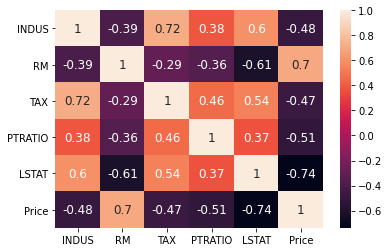

In [8]:
sns.heatmap(correlated_data.corr(), annot=True, annot_kws={'size': 12},linewidth =0)
plt.show()

### Splitting the data for the model

After a quick check, by selecting the most correlated data model accuracy drops by ca. 2pp at random forest regressor. In conclusion, selecting only important parameters can be useful by in large scale projects, but in this specific case it only worsen the final results.

In [9]:
# X = correlated_data.drop(columns= ['Price'], axis=1)
# y= correlated_data['Price']
# print(X.head())
# print(y.head())

In [10]:
X = data.drop(columns= ['Price'], axis=1)
y= data['Price']
print(X.head())
print(y.head())

      CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33

[5 rows x 13 columns]
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64


# House price vs lower status of the population


In [18]:
X = data.drop(columns= ['Price'], axis=1).values
y= data['Price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 3)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

lstat_index=data.keys().get_loc('LSTAT')
data.LSTAT

0      4.98
1      9.14
2      4.03
3      2.94
4      5.33
       ... 
501    9.67
502    9.08
503    5.64
504    6.48
505    7.88
Name: LSTAT, Length: 506, dtype: float64

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>


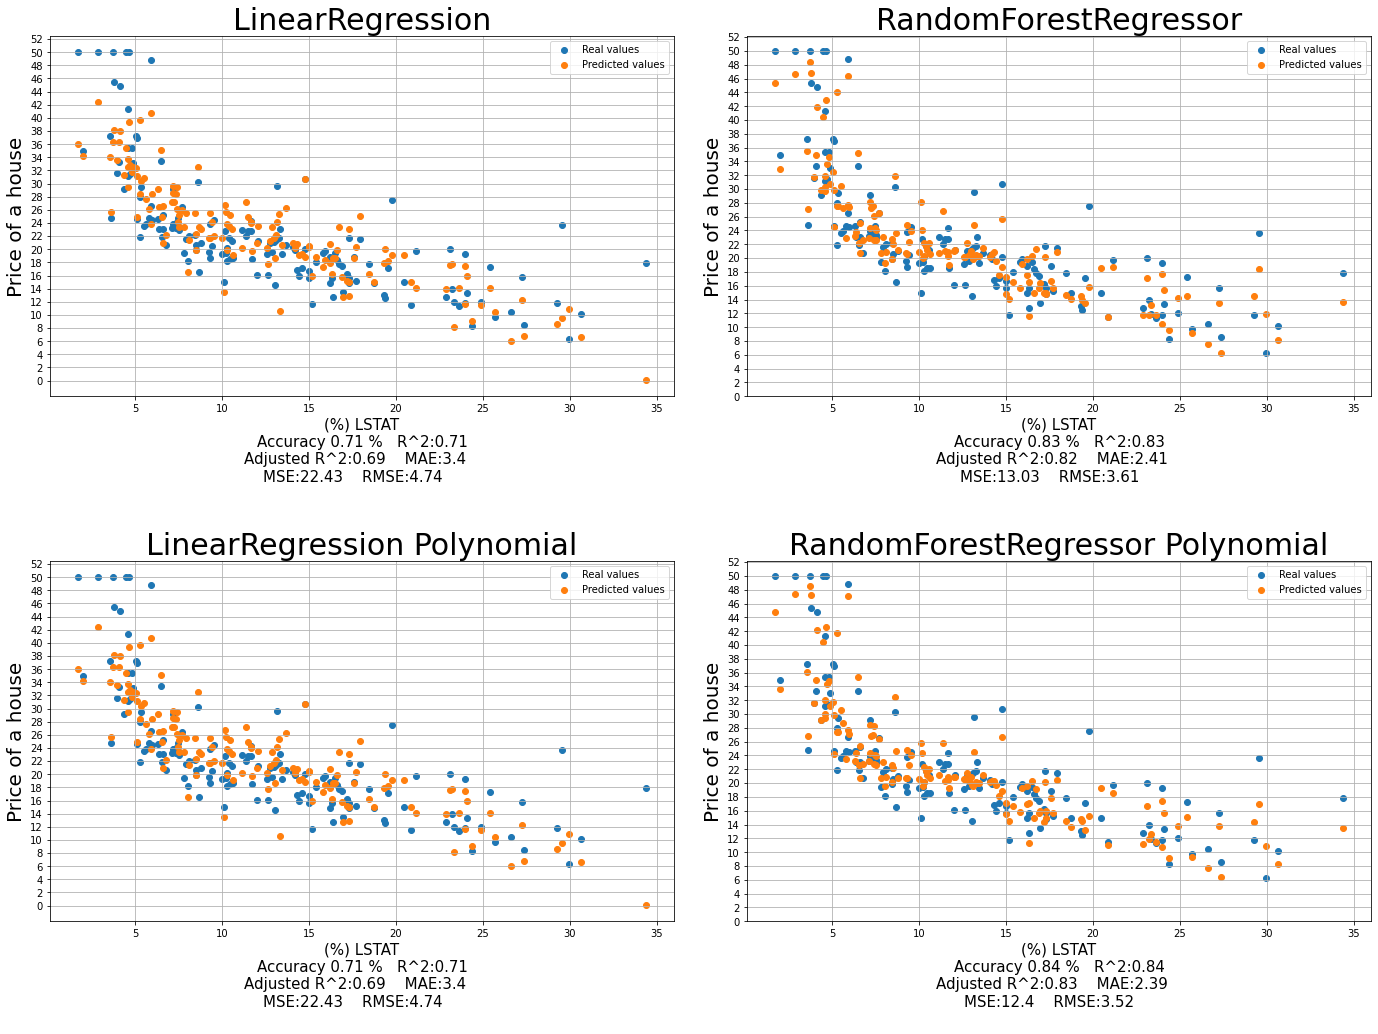

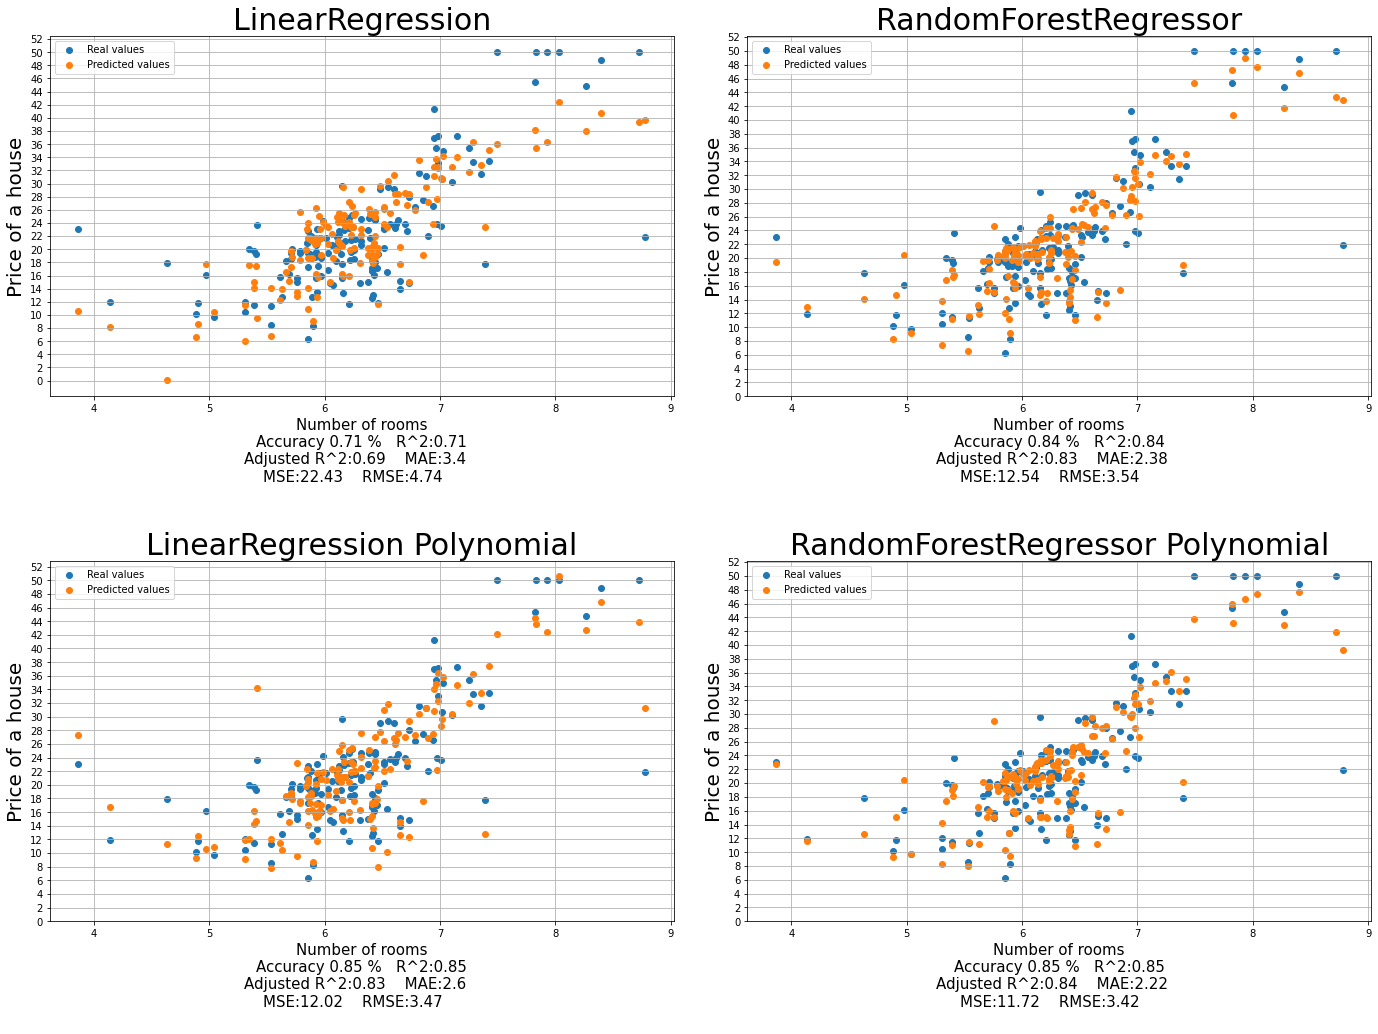

In [38]:
def plot_models(X, y,poly='',correlation="LSTAT",  ):
    
    fig, axes = plt.subplots(2, 2, figsize=(20, 15))
    
    modelList=[LinearRegression(), RandomForestRegressor()]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 3)

    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    index=data.keys().get_loc(correlation)
    
    for row in range(len(axes)):
      for model in modelList:
        model = model
        if poly and row == 1:
          X_train_poly = PolynomialFeatures(degree=2).fit_transform(X_train)
          X_test_poly = PolynomialFeatures(degree=2).fit_transform(X_test)
          model.fit(X_train_poly, y_train.reshape(-1, 1))
          y_test_pred = model.predict(X_test_poly)
        else:
          model.fit(X_train, y_train.reshape(-1, 1))
          y_test_pred = model.predict(X_test)
        inv_sc= sc.inverse_transform(X_test)
        axes[row][modelList.index(model)].scatter(inv_sc[:,index], y_test, label = "Real values");
        axes[row][modelList.index(model)].scatter(inv_sc[:,index], y_test_pred, label = "Predicted values");
        axes[row][modelList.index(model)].legend()
        axes[row][modelList.index(model)].grid()

        axes[row][modelList.index(model)].set_yticks(np.arange(0, 54, 2))

        score = r2_score(y_test, y_test_pred)

        axes[row][modelList.index(model)].set_title(type(model).__name__+ (' Polynomial' if poly!=None and row==1 else ''), fontsize=30 )
        axes[row][modelList.index(model)].set_xlabel(('(%) LSTAT\n' if correlation=="LSTAT" else 'Number of rooms\n')+
                                                    f'Accuracy {round(score,2)} %   '
                                                    f'R^2:{round(r2_score(y_test, y_test_pred),2)}\n'
                                                    f'Adjusted R^2:{round(1 - (1-r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_train.shape[1]-1),2)}    '
                                                    f'MAE:{round(mean_absolute_error(y_test, y_test_pred),2)}   \n'
                                                    f'MSE:{round(mean_squared_error(y_test, y_test_pred),2)}    '
                                                    f'RMSE:{round(mean_squared_error(y_test, y_test_pred, squared=False),2)}    \n', fontsize=15)
        axes[row][modelList.index(model)].set_ylabel("Price of a house", fontsize=20)

    fig.tight_layout(pad=3.0)
    return plt
# fig, axes = plt.subplots(3, 2, figsize=(20, 20))

plot_models(X, y, correlation="LSTAT")

print(plot_models(X, y, poly="True", correlation="RM"))


### Linear Model without Polynomial Features

In [ ]:
b= sc.inverse_transform(X_test)
b

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train.reshape(-1, 1))
y_train_pred = lin_reg.predict(X_test)
plt.figure(figsize=(10,8));
plt.title("Price vs LSTAT",fontsize=30)
plt.xlabel("(%) Lower status of the population", fontsize=20)
plt.ylabel("Price of a house", fontsize=20)
plt.yticks(np.arange(0, 54, 2))
inv_sc= sc.inverse_transform(X_test)

plt.scatter(inv_sc[:,lstat_index], y_test, label = "Real values");
plt.scatter(inv_sc[:,lstat_index], y_train_pred, label = "Predicted values");
plt.legend()
plt.grid()
print(r2_score(y_test, y_train_pred))

### Linear Model with Polynomial features

In [ ]:
from sklearn.preprocessing import StandardScaler

poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train)
y_test_pred = lin_reg.predict(poly_reg.fit_transform(X_test))
plt.figure(figsize=(10,8));
plt.title("Price vs LSTAT",fontsize=30)
plt.xlabel("(%) Lower status of the population", fontsize=20)
plt.ylabel("Price of a house", fontsize=20)
plt.yticks(np.arange(0, 54, 2))
plt.scatter(X_test[:,lstat_index], y_test, label = "Real values");
plt.scatter(X_test[:,lstat_index], y_test_pred, label = "Predicted values");
plt.legend()
plt.grid()
print(r2_score(y_test, y_test_pred))

In [ ]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_test, y_test_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

### Random Forest Reggressor with Polynomial Features

In [ ]:
poly_reg_3 = PolynomialFeatures(degree=2)
X_poly_3 = poly_reg_3.fit_transform(X_train)
RFR_model= RandomForestRegressor()
RFR_model.fit(X_train, y_train)
y_test_pred = RFR_model.predict(X_test)
plt.figure(figsize=(10,8));
plt.title("Price vs LSTAT",fontsize=30)
plt.xlabel("(%) Lower status of the population", fontsize=20)
plt.ylabel("Price of a house", fontsize=20)
plt.yticks(np.arange(0, 54, 2))
plt.scatter(X_test[:,lstat_index], y_test, label = "Real values");
plt.scatter(X_test[:,lstat_index], y_pred, label = "Predicted values");
plt.legend()
plt.grid()
print(r2_score(y_test, y_pred))

In [ ]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_test, y_test_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

#House price vs average number of rooms per dwelling

In [ ]:
rm_index=data.keys().get_loc('RM')

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
linear_pred = lin_reg.predict(X_test)
plt.figure(figsize=(10,8));
plt.xlabel("Number of rooms", fontsize=20)
plt.ylabel("Price of a house", fontsize=20)
plt.title("Price vs Number of rooms",fontsize=30)
plt.yticks(np.arange(0, 54, 2))
plt.scatter(X_test[:,rm_index], y_test, label = "Real values");
plt.scatter(X_test[:,rm_index], linear_pred, label = "Predicted values");
plt.legend()
plt.grid()
print(r2_score(y_test, linear_pred))

In [ ]:
polynomial_feature = PolynomialFeatures(degree=2)
X_train_poly = polynomial_feature.fit_transform(X_train)
X_test_poly = polynomial_feature.fit_transform(X_test)


poly_lin_reg = LinearRegression()
poly_lin_reg.fit(X_train_poly, y_train)
y_test_pred = poly_lin_reg.predict(X_test_poly)
plt.figure(figsize=(10,8));
plt.title("Price vs Number of rooms",fontsize=30)
plt.xlabel("(%) Lower status of the population", fontsize=20)
plt.ylabel("Price of a house", fontsize=20)
plt.yticks(np.arange(0, 54, 2))

plt.scatter(X_test[:,rm_index], y_test, label = "Real values");
plt.scatter(X_test[:,rm_index], y_test_pred, label = "Predicted values");
plt.legend()
plt.grid()
print(r2_score(y_test, y_test_pred))


In [ ]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_test, y_test_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [ ]:
poly_reg_3 = PolynomialFeatures(degree=2)
X_train_poly = poly_reg_3.fit_transform(X_train)
X_test_poly = poly_reg_3.fit_transform(X_test)

RFR_model= RandomForestRegressor()
RFR_model.fit(X_train_poly, y_train)
y_train_pred = RFR_model.predict(X_train_poly)
y_test_pred = RFR_model.predict(X_test_poly)
plt.figure(figsize=(10,8));
plt.xlabel("Number of rooms", fontsize=20)
plt.ylabel("Price of a house", fontsize=20)
plt.title("Price vs Number of rooms",fontsize=30)
plt.yticks(np.arange(0, 54, 2))
plt.scatter(X_test[:,rm_index], y_test, label = "Real values");
plt.scatter(X_test[:,rm_index], y_test_pred, label = "Predicted values");
plt.legend()
plt.grid()
print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

print('R^2:',r2_score(y_test, y_test_pred))
print('Adjusted R^2:',1 - (1-r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_train.shape[1]-1))
print('MAE:',mean_absolute_error(y_test, y_test_pred))
print('MSE:',mean_squared_error(y_test, y_test_pred))
print('RMSE:',mean_squared_error(y_test, y_test_pred, squared=False))

In [ ]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_test, y_test_pred)
plt.scatter(y_train, y_train_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [ ]:
sns.distplot(y_test-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 2, figsize=(10, 15))

X, y = load_boston(return_X_y=True)

title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = Ridge()
plot_learning_curve(estimator, title, X, y, axes=axes[:, 0], ylim=(0.5, 1.01),
                    cv=cv, n_jobs=-1)

title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = RandomForestRegressor()
plot_learning_curve(estimator, title, X, y, axes=axes[:, 1], ylim=(0.5, 1.01),
                    cv=cv, n_jobs=-1)

plt.show()